In [1]:
import pandas as pd
import numpy as np

df=pd.DataFrame({'x':[12,24,28,33,18,29,52,45,24,55,51,61,53,69,72,64,49,58],
                  'y':[36,39,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7]})


In [2]:
df.head()

,x,y
0,12,36
1,24,39
2,28,30
3,33,52
4,18,54


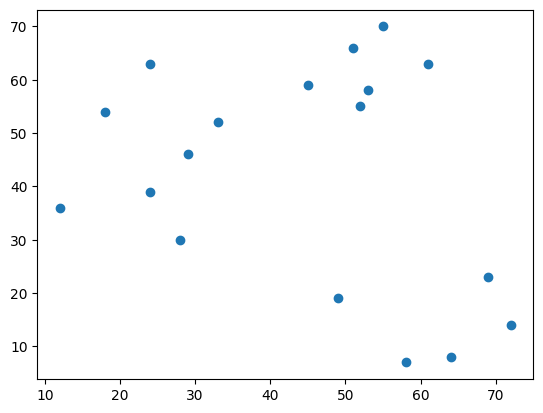

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.x, df.y)
plt.show()

In [4]:
from sklearn.cluster import KMeans
model_0 = KMeans(n_clusters=3)
model_0.fit(df)


c:\Users\amalb\OneDrive\Desktop\deep learning\python_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [5]:
df['label'] = model_0.predict(df)

In [6]:
df.head()

,x,y,label
0,12,36,0
1,24,39,0
2,28,30,0
3,33,52,0
4,18,54,0


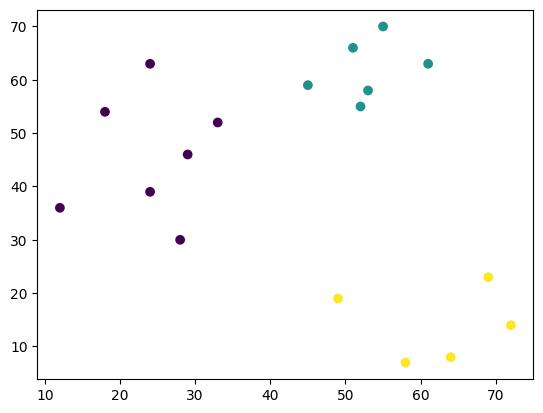

In [7]:
plt.scatter(df.x, df.y,c=df.label)

In [6]:
x_low, x_high = min(df.x), max(df.x)
y_low, y_high = min(df.y), max(df.y)

In [7]:
cent = []
for _ in range(3):
    x, y = np.random.randint(x_low, x_high), np.random.randint(y_low, y_high)
    cent.append([x, y])



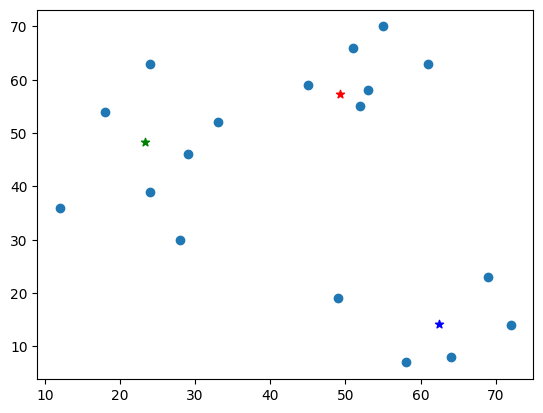

In [28]:
plt.scatter(df.x, df.y)
color_mapping = {0: 'red', 1: 'green', 2: 'blue'}
for i,c_i in enumerate(cent):
    x, y = c_i[0], c_i[1]
    plt.scatter(x, y, c= color_mapping[i], marker='*')

In [29]:
for i, c_i in enumerate(cent):
    df[i] = np.sqrt((df.x - c_i[0])** 2 + (df.y - c_i[1])** 2)

df.head()

,x,y,0,1,2,label
0,12,36,42.933741,16.749793,54.912658,green
1,24,39,31.204722,9.357113,45.712143,green
2,28,30,34.606240,18.917951,37.854986,red
3,33,52,17.122011,10.338708,47.887368,green
4,18,54,31.457779,7.781745,59.627175,green


In [30]:
df['label'] = df.loc[:,[i for i in range(3)]].idxmin(axis=1)
df.label = df.label.map(lambda x: color_mapping[x])
df.head()

,x,y,0,1,2,label
0,12,36,42.933741,16.749793,54.912658,green
1,24,39,31.204722,9.357113,45.712143,green
2,28,30,34.606240,18.917951,37.854986,green
3,33,52,17.122011,10.338708,47.887368,green
4,18,54,31.457779,7.781745,59.627175,green


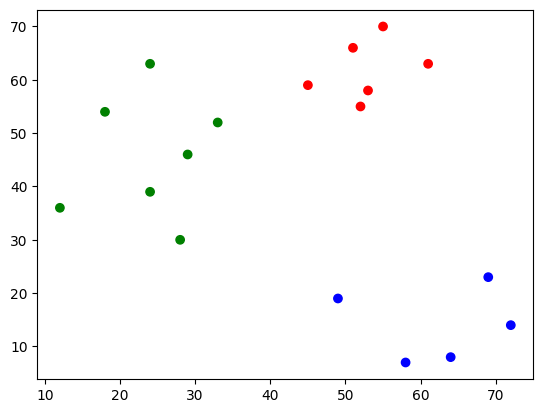

In [31]:
plt.scatter(df.x, df.y, c=df.label)

In [14]:
cluster_avg = df.groupby('label')[['x', 'y']].mean()
cluster_avg

,x,y
label,,
blue,62.400000,14.200000
green,23.333333,48.333333
red,49.285714,57.285714


In [23]:
print(cent)
cluster_avg.loc['red']['y']

[[41, 50], [33, 55], [55, 15]]


57.285714285714285

In [26]:
for i, c_i in enumerate(cent):
    c_i[0], c_i[1] = cluster_avg.loc[color_mapping[i], 'x'], cluster_avg.loc[color_mapping[i], 'y']


In [27]:
print(cent)

[[49.285714285714285, 57.285714285714285], [23.333333333333332, 48.333333333333336], [62.4, 14.2]]


In [37]:
from sklearn.cluster import KMeans
model_1 = KMeans(n_clusters=3)
model_1.fit(df.loc[:, ['x', 'y']])

c:\Users\amalb\OneDrive\Desktop\deep learning\python_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [42]:
df.label = model_1.predict(df.loc[:, ['x', 'y']])
df.head()

,x,y,0,1,2,label
0,12,36,42.933741,16.749793,54.912658,2
1,24,39,31.204722,9.357113,45.712143,2
2,28,30,34.606240,18.917951,37.854986,2
3,33,52,17.122011,10.338708,47.887368,2
4,18,54,31.457779,7.781745,59.627175,2


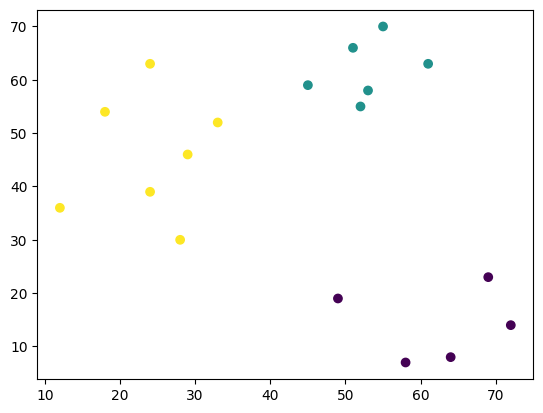

In [44]:
plt.scatter(df.x, df.y, c=df.label)

In [45]:
print(model_1.cluster_centers_)

[[62.4        14.2       ]
 [52.83333333 61.83333333]
 [24.         45.71428571]]
